## Project - Fundamentals of Data Analysis

### Course: HDip in Computing in Data Analytics
### Module:  Fundamentals of Data Analysis
### Lecturer: Ian McLoughlin
### Student: Sarah Hastings 

***

### Introduction 

* The project is to create a notebook investigating the variables and data points within the well-known iris flower data set associated with Ronald A Fisher.

* In the notebook, you should discuss the classification of each variable within the data set according to common variable types and scales of measurement in mathematics, statistics, and Python.

* Select, demonstrate, and explain the most appropriate summary statistics to describe each variable.

* Select, demonstrate, and explain the most appropriate plot(s) for each variable.

* The notebook should follow a cohesive narrative about the data set.

Firstly, to start off with some background to the Iris flower, its dataset, what is it and why is it so popular. Iris is a flowering plant, researchers have measured various features and attributes of the different iris flowers species and recorded these digitally. The iris dataset is a collection of 150 samples of iris flowers, each flower has 4 attributes/features – the sepal length, sepal width, petal length and petal width, all features are in centimetres. Based on the features the species of the flower can be determined, as either Iris-setosa, Iris-versicolor or Iris-virginica. The dataset contains 50 samples of each species. The goal of the iris dataset is to be able to determine or predict the flower species based on its features.
The Fisher’s paper on the Iris dataset was published by Ronald Fisher in 1936 and became one of the most widely used dataset in data science, used for exploratory data analysis, machine learning, and data visualization and much more. The analysis of the iris dataset is great in many ways, it is a small dataset and easy to work with in this sense but it still provides enough data to produce meaningful results. There is lots of data out there and it is easy to get lost in it all, one major positive is with python for example there is an endless amount of libraries and tools that can be used to help analyse and visualise the data. This analysis leads to a world outside of the standard excel analysis and is the hello world in data science. Some interesting facts to note along with the Fisher’s paper in 1936, at the same time the Turing machine, a computing device, the first of its kind, was created by Alan Turing in 1936-7. This was the foundation of computer science, Turing also developed Bombe computer to break the Enigma Code during World War II, which was estimated to have shortened war by more than 2 years and saved 14 million lives. Also 1936 was significant in that Margaret Hamilton was born, she went on to become a computer scientist, one of the first computer software programmers, she created the term software engineer and led the team that created the onboard flight software for the Apollo missions, Apollo 11, landing astronauts on the moon. A significant year over all 1936, with Fisher, Turing and Hamilton each making massive, significant contributions to their respective fields which still have an impact and are used to this current day.

![image](https://www.embedded-robotics.com/wp-content/uploads/2022/01/Iris-Dataset-Classification-1024x367.png)

## Importing Libraries

In [19]:
# Import pandas to allow for data analysis, manipulation, work with dataframes
import pandas as pd
# Use Pyplot, part of the Matplotlib library to visualize diagrams/use for visual data/plots etc 
import matplotlib.pyplot as plt
# Import numpy to work with numerical data, arrays
import numpy as np
# Importing seaborn gives a variety of visualization patterns in addition to matplotlib
import seaborn as sns
# Useful for plotting visual relationships between data 
from pandas.plotting import andrews_curves
# Split the dataset into train and test models
from sklearn.model_selection import train_test_split
# Training model
from sklearn.preprocessing import StandardScaler
# Classification and Logistic regression
from sklearn.linear_model import LogisticRegression
# View accuracy/predictability
from sklearn.metrics import accuracy_score,confusion_matrix


### Data Loading and Overview


In [2]:
# Read iris.data file into a DataFrame

df = pd.read_csv('./data/iris.csv', delimiter=',')

df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [20]:
#read iris.data file into a DataFrame, allowed through use of pandas imported
df = pd.read_csv('iris.data', delimiter=',')
df

FileNotFoundError: [Errno 2] No such file or directory: 'iris.data'

In [3]:
## Summary of the data 

print(df.shape)
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())
print(df.nunique())
print(df.isnull())
print(df.isnull().any())
print(df.isnull().sum())
print(df['class'].value_counts())

(150, 5)
   sepal_length  sepal_width  petal_length  petal_width   class
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
     sepal_length  sepal_width  petal_length  petal_width      class
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0 

In [4]:
# Get a summary of each variable 
with open('./data/iris_summary.txt', 'w') as f:
    #Create a variable/heading name for each 
    sepal_length_summary = df['sepal_length'].describe()
    sepal_width_summary = df['sepal_width'].describe()
    petal_length_summary = df['petal_length'].describe()
    petal_width_summary = df['petal_width'].describe()
    
    #Write the summary information to the new text file 
    f.write('Summary for Sepal Length:\n{}\n\n'.format(sepal_length_summary))
    f.write('Summary for Sepal Width:\n{}\n\n'.format(sepal_width_summary))
    f.write('Summary for Petal Length:\n{}\n\n'.format(petal_length_summary))
    f.write('Summary for Petal Width:\n{}\n\n'.format(petal_width_summary))

Histograms allow seeing the distribution of data for various columns


The highest frequency of the sepal length is between 30 and 35 which is between 5.5 and 6
The highest frequency of the sepal Width is around 70 which is between 3.0 and 3.5
The highest frequency of the petal length is around 50 which is between 1 and 2
The highest frequency of the petal width is between 40 and 50 which is between 0.0 and 0.5

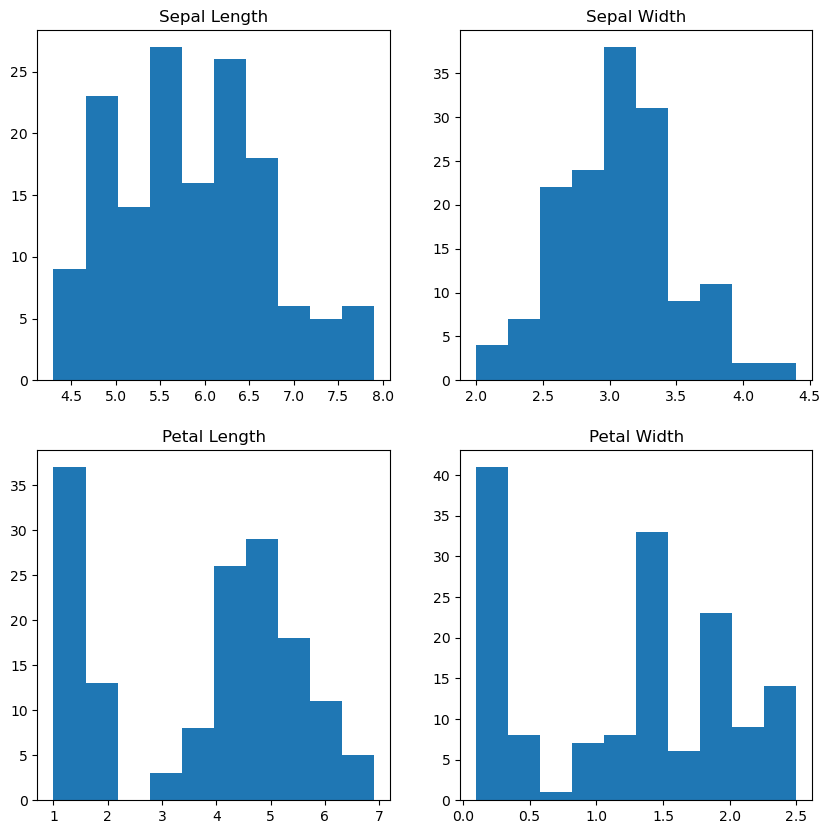

In [5]:
# Create subplots to create histogram of all variables together
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Create a histogram for each variable
axs[0, 0].hist(df['sepal_length'], bins=10)
axs[0, 0].set_title('Sepal Length')
axs[0, 1].hist(df['sepal_width'], bins=10)
axs[0, 1].set_title('Sepal Width')
axs[1, 0].hist(df['petal_length'], bins=10)
axs[1, 0].set_title('Petal Length')
axs[1, 1].hist(df['petal_width'], bins=10)
axs[1, 1].set_title('Petal Width')

# Display the subplots
plt.show()

INFO FROM SCATTER PLOTS
Comparing Sepal Length and Sepal Width
Species Setosa has smaller sepal lengths but larger sepal widths.
Versicolor Species lies in the middle of the other two species in terms of sepal length and width
Species Virginica has larger sepal lengths but smaller sepal widths.


Comparing Petal Length and Petal Width
Species Setosa has smaller petal lengths and widths.
Versicolor Species lies in the middle of the other two species in terms of petal length and width
Species Virginica has the largest of petal lengths and widths.

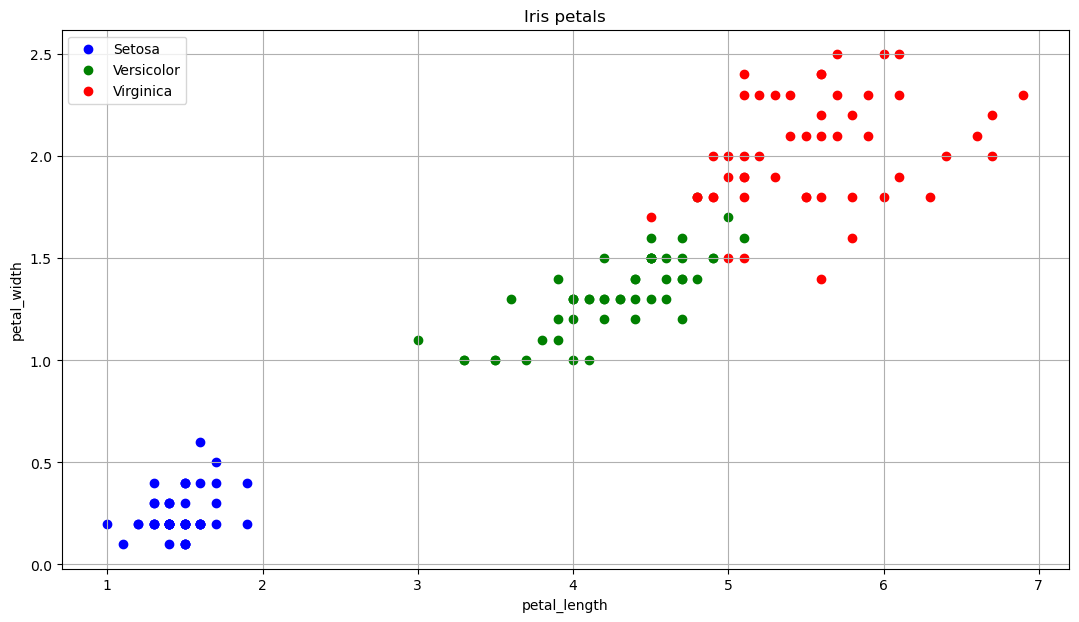

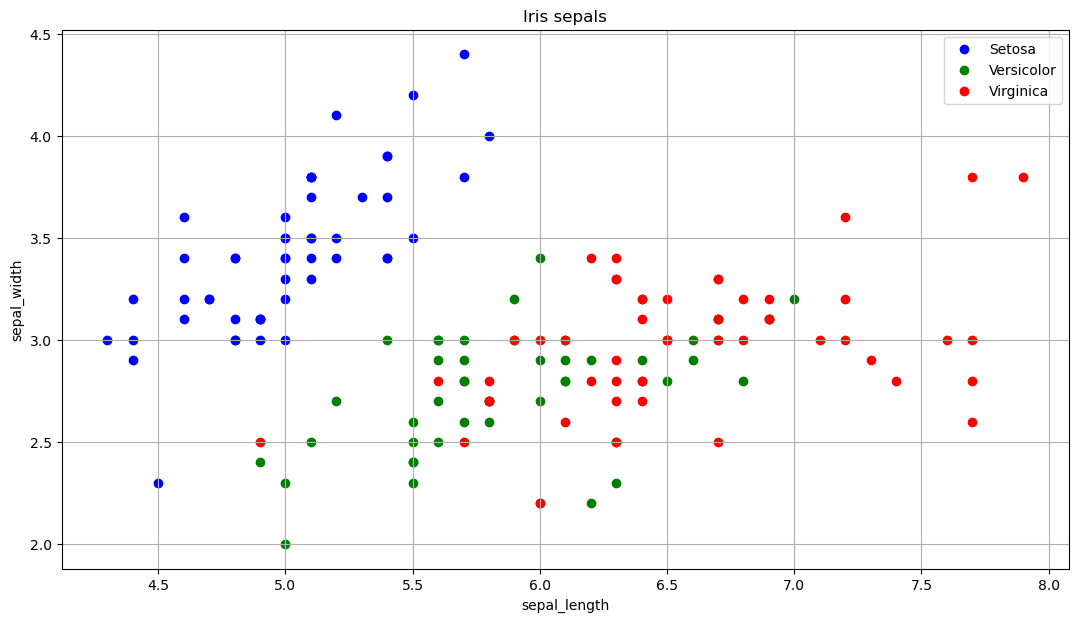

In [6]:
#Scatter plot of variables for petals, sepals
setosa = df[df['class'] == 'setosa']
versicolor = df[df['class'] =='versicolor']
virginica = df[df['class'] =='virginica']

fig, ax = plt.subplots()
#Adjusting the length and width of plot
fig.set_size_inches(13, 7) 

#Lables and scatter points
ax.scatter(setosa['petal_length'], setosa['petal_width'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['petal_length'], versicolor['petal_width'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal_length'], virginica['petal_width'], label="Virginica", facecolor="red")

#Petals data
ax.set_xlabel('petal_length')
ax.set_ylabel('petal_width')
ax.grid()
ax.set_title('Iris petals')
ax.legend()
#plt.savefig('Iris petals')

#Sepals data
fig, ax = plt.subplots()
fig.set_size_inches(13, 7)
#Lables and scatter points
ax.scatter(setosa['sepal_length'], setosa['sepal_width'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['sepal_length'], versicolor['sepal_width'], label="Versicolor", facecolor="green")
ax.scatter(virginica['sepal_length'], virginica['sepal_width'], label="Virginica", facecolor="red")

ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')
ax.grid()
ax.set_title('Iris sepals')
ax.legend()
#plt.savefig('Iris sepals')
plt.show()


pAIRPLOT  plot all the column’s relationships using a pairplot.
We can see many types of relationships from this plot such as the species Setosa has the smallest of petals widths and lengths. It also has the smallest sepal length but larger sepal widths. Such information can be gathered about any other species.

KeyError: 'species'

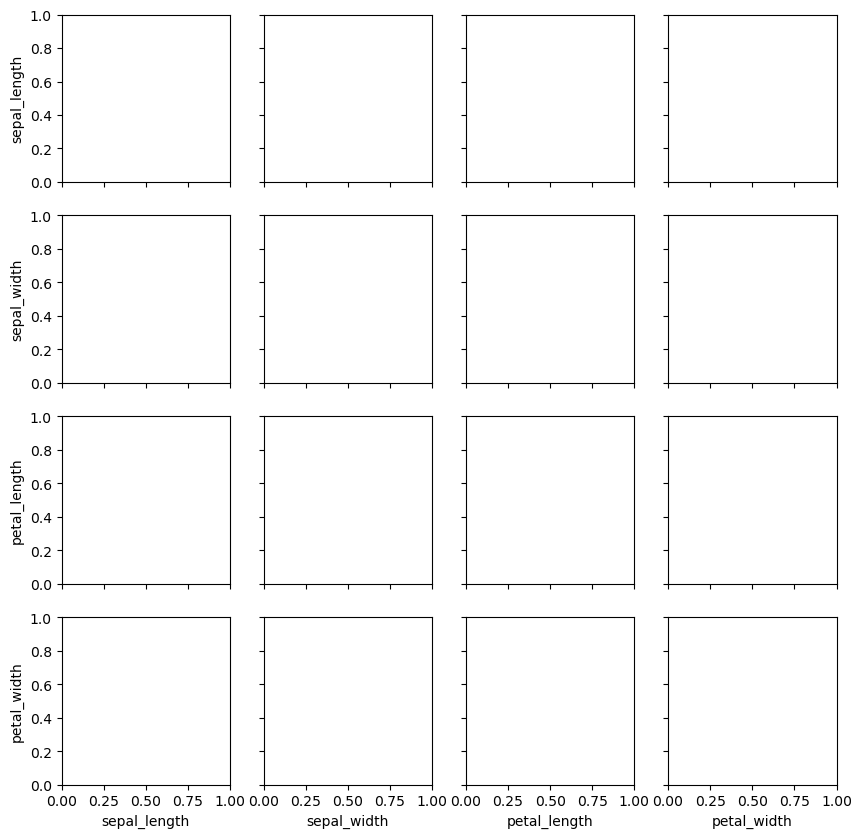

In [15]:
# Create a pairplot - using seaborn and matplotlib module - this is a useful in visualising the 3 species in pairs and see how they pair up together

sns.pairplot(df, hue='species')

plt.show()

In [ ]:
boxplots to see how the categorical value os distributed with other numerical values

INSERT BOXPLOT

Species Setosa has the smallest features and less distributed with some outliers.
Species Versicolor has the average features.
Species Virginica has the highest features

ValueError: Could not interpret input 'species'

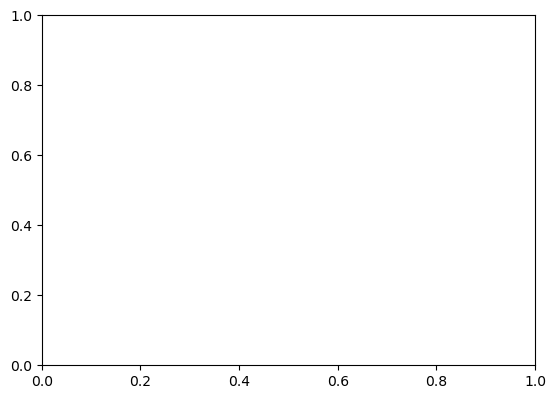

In [16]:
#Create a violin plot - another usual visual using seaborn
#Adjust the length and width of plot
plt.figure(figsize=(14,10))  
plt.subplot(2,2,1)
sns.violinplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='sepal_width',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='petal_width',data=df)
plt.show() 

In [ ]:
# Create Swarm plots for each feature
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.swarmplot(x='class', y=column, data=df)
    plt.title(f'{column} distribution by class')
plt.show()


#If the warning persists, you might consider using stripplot instead. stripplot is similar to swarmplot but doesn't attempt to adjust the positions of points to avoid overlap.

In [ ]:
#Create boxplots to show any unusual data points

# Set the overall figure size
plt.figure(figsize=(15, 15))

# Subplot 1
plt.subplot(4, 2, 1)
fig = df.boxplot(column='sepal_length', color='red')
fig.set_title('Boxplot of Sepal Length')
fig.set_ylabel('sepal_length')

# Subplot 2
plt.subplot(4, 2, 2)
fig = df.boxplot(column='sepal_width', color='red')
fig.set_title('Boxplot of Sepal Width')
fig.set_ylabel('sepal_width')

# Subplot 3
plt.subplot(4, 2, 3)
fig = df.boxplot(column='petal_length', color='red')
fig.set_title('Boxplot of Petal Length')
fig.set_ylabel('petal_length')

# Subplot 4
plt.subplot(4, 2, 4)
fig = df.boxplot(column='petal_width', color='red')
fig.set_title('Boxplot of Petal Width')
fig.set_ylabel('petal_width')

# Display the plot
plt.show()

In [ ]:
# Andrews Curves - visual using pandas, create the curves plot with the colormap
andrews_curves(df, 'species', colormap='plasma')
plt.title('Andrews Curves Plot - Iris Dataset')
plt.show()

In [ ]:
#Correlation matrix & heatmap - further analysis on relationship and patterns, displaying in a heatmap, note the creation of a variable to obtain the numeric data for this function
numeric_columns = df.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()
#print(correlation_matrix)
sns.heatmap(correlation_matrix, cmap = "YlGnBu", linecolor = 'white', linewidths = 1, annot = True)
plt.title('Correlation Heatmap - Iris Dataset')
plt.show()

### Model Training

In [ ]:
#Split the Data Into Train and Test Datasets, using iloc to get specific rows/columns from the dataframe needed for the train, test sets 
x = df.iloc[:,:-1].values
y = df.iloc[:,4].values
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
#Testing the shape to ensure correct values based on the 75% training, 25% test split on the data, you can use the below shape() function
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)



In [ ]:
#Create the Model (Classification - logistic regression)
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
#print(y_pred)
cm=(confusion_matrix(y_test,y_pred))
#print(cm)

In [ ]:
#Display the confusion matrix
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
#plt.savefig('Confusion matrix Iris Dataset.png') 
plt.show()



In [ ]:
accuracy=accuracy_score(y_test,y_pred)*100 
print("Accuracy of the model is {:.2f}".format(accuracy),"%.")


### K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier()
model2.fit(x_train,y_train)
acc_knn = model2.score(x_test, y_test)*100
print("Accuracy (KNN): ",acc_knn)

In [ ]:
References

### End